In [1]:
## Libraries
import numpy as np
import cv2
import os
import random
import sys
from tqdm import tqdm
import gc
import matplotlib.pyplot as plt

from Autoencoder import *
from make_video import *

import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import l1
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import ModelCheckpoint

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

1 Physical GPUs, 1 Logical GPUs


In [27]:
def autoencoder(img_shape, code_size,name,shape_req):
    if name=='Hi-Res':
        ##################################
        ####### First Autoencoder ########
        ##################################

        # The encoder 1
        encoder1_1 = Input(img_shape,name='encoder1_input')
        encoder1_2 = Conv2D(filters=32,kernel_size=3,strides=2,padding='same',name='E1Layer1',activation='relu')(encoder1_1)
        encoder1_3 = Conv2D(filters=32,kernel_size=3,strides=2,padding='same',name='E1Layer2',activation='relu')(encoder1_2)
        encoder1_4 = Conv2D(filters=32,kernel_size=3,strides=2,padding='same',name='E1Layer3',activation='relu')(encoder1_3)
        encoder1_5 = Conv2D(filters=32,kernel_size=3,strides=2,padding='same',name='E1Layer4',activation='relu')(encoder1_4)

        encoder1 = Model(encoder1_1,encoder1_5)

        # The decoder 1
        decoder1_1 = Input(encoder1.get_layer('E1Layer4').output_shape[1:],name='decoder1_input')
        decoder1_2 = Conv2DTranspose(filters=32,kernel_size=3,strides=2,padding='same',name='D1Layer1',activation='relu')(decoder1_1)
        decoder1_3 = Conv2DTranspose(filters=32,kernel_size=3,strides=2,padding='same',name='D1Layer2',activation='relu')(decoder1_2)
        decoder1_4 = Conv2DTranspose(filters=32,kernel_size=3,strides=2,padding='same',name='D1Layer3',activation='relu')(decoder1_3)
        decoder1_5 = Conv2DTranspose(filters=3,kernel_size=3,strides=2,padding='same',name='D1Layer4',activation='relu')(decoder1_4)

        decoder1 = Model(decoder1_1,decoder1_5)

        inp = Input(img_shape)
        code = encoder1(inp)
        reconstruction = decoder1(code)
        autoencoder1 = Model(inp,reconstruction)

        ##################################
        ####### Second Autoencoder #######
        ##################################

        # The encoder 2
        encoder2_1 = Input(img_shape,name='encoder2_input')
        encoder2_2 = Conv2D(filters=256,kernel_size=3,strides=2,padding='same',activation='relu',activity_regularizer=l1(10e-10),name='E2Layer1')(encoder2_1)
        encoder2_3 = Conv2D(filters=128,kernel_size=3,strides=2,padding='same',activation='relu',activity_regularizer=l1(10e-10),name='E2Layer2')(encoder2_2)
        encoder2_4 = Conv2D(filters=64,kernel_size=3,strides=2,padding='same',activation='relu',activity_regularizer=l1(10e-10),name='E2Layer3')(encoder2_3)
        encoder2_5 = Conv2D(filters=32,kernel_size=3,strides=2,padding='same',activation='relu',activity_regularizer=l1(10e-10),name='E2Layer4')(encoder2_4)

        # The decoder 2
        decoder2_2 = Conv2DTranspose(filters=64,kernel_size=3,strides=2,padding='same',activation='relu',activity_regularizer=l1(10e-10),name='D2Layer1')(encoder2_5)
        add2_1 = add([decoder2_2,encoder2_4]) # Residual Connection 
        decoder2_3 = Conv2DTranspose(filters=128,kernel_size=3,strides=2,padding='same',activation='relu',activity_regularizer=l1(10e-10),name='D2Layer2')(add2_1)
        decoder2_4 = Conv2DTranspose(filters=256,kernel_size=3,strides=2,padding='same',activation='relu',activity_regularizer=l1(10e-10),name='D2Layer3')(decoder2_3)
        add2_2 = add([decoder2_4,encoder2_2]) # Residual Connection 
        decoder2_5 = Conv2DTranspose(filters=3,kernel_size=3,strides=2,padding='same',activation='relu',activity_regularizer=l1(10e-10),name='D2Layer4')(add2_2)

        autoencoder2 = Model(encoder2_1,decoder2_5)
        
        return autoencoder1,autoencoder2
    
    elif name == "Hi-Res_2":
        ##################################
        ####### First Autoencoder ########
        ##################################

        # The encoder 1
        encoder1_1 = Input(img_shape,name='encoder1_input')
        encoder1_2 = Conv2D(filters=32,kernel_size=3,strides=2,padding='same',name='E1Layer1')(encoder1_1)
        encoder1_3 = Conv2D(filters=32,kernel_size=3,strides=2,padding='same',name='E1Layer2')(encoder1_2)
        encoder1_4 = Conv2D(filters=32,kernel_size=3,strides=2,padding='same',name='E1Layer3')(encoder1_3)
        # encoder1_5 = Conv2D(filters=32,kernel_size=3,strides=2,padding='same',name='E1Layer4')(encoder1_4)

        encoder1 = Model(encoder1_1,encoder1_4)

        # The decoder 1
        decoder1_1 = Input(encoder1.get_layer('E1Layer3').output_shape[1:],name='decoder1_input')
        # decoder1_2 = Conv2DTranspose(filters=32,kernel_size=3,strides=2,padding='same',name='D1Layer1')(decoder1_1)
        decoder1_3 = Conv2DTranspose(filters=32,kernel_size=3,strides=2,padding='same',name='D1Layer2')(decoder1_1)
        decoder1_4 = Conv2DTranspose(filters=32,kernel_size=3,strides=2,padding='same',name='D1Layer3')(decoder1_3)
        decoder1_5 = Conv2DTranspose(filters=3,kernel_size=3,strides=2,padding='same',name='D1Layer4')(decoder1_4)

        decoder1 = Model(decoder1_1,decoder1_5)

        inp = Input(img_shape)
        code = encoder1(inp)
        reconstruction = decoder1(code)
        autoencoder1 = Model(inp,reconstruction)

        ##################################
        ####### Second Autoencoder #######
        ##################################

        # The encoder 2
        encoder2_1 = Input(img_shape,name='encoder2_input')
        encoder2_2 = Conv2D(filters=256,kernel_size=3,strides=2,padding='same',activation='relu',activity_regularizer=l1(10e-10),name='E2Layer1')(encoder2_1)
        encoder2_3 = Conv2D(filters=128,kernel_size=3,strides=2,padding='same',activation='relu',activity_regularizer=l1(10e-10),name='E2Layer2')(encoder2_2)
        encoder2_4 = Conv2D(filters=64,kernel_size=3,strides=2,padding='same',activation='relu',activity_regularizer=l1(10e-10),name='E2Layer3')(encoder2_3)
        # encoder2_5 = Conv2D(filters=32,kernel_size=3,strides=2,padding='same',activation='relu',activity_regularizer=l1(10e-10),name='E2Layer4')(encoder2_4)

        # The decoder 2
        decoder2_2 = Conv2DTranspose(filters=128,kernel_size=3,strides=2,padding='same',activation='relu',activity_regularizer=l1(10e-10),name='D2Layer1')(encoder2_4)
        add2_1 = add([decoder2_2,encoder2_3]) # Residual Connection 
        # decoder2_3 = Conv2DTranspose(filters=128,kernel_size=3,strides=2,padding='same',activation='relu',activity_regularizer=l1(10e-10),name='D2Layer2')(add2_1)
        decoder2_4 = Conv2DTranspose(filters=256,kernel_size=3,strides=2,padding='same',activation='relu',activity_regularizer=l1(10e-10),name='D2Layer3')(add2_1)
        add2_2 = add([decoder2_4,encoder2_2]) # Residual Connection 
        decoder2_5 = Conv2DTranspose(filters=3,kernel_size=3,strides=2,padding='same',activation='relu',activity_regularizer=l1(10e-10),name='D2Layer4')(add2_2)

        autoencoder2 = Model(encoder2_1,decoder2_5)
        
        return autoencoder1,autoencoder2
        
def data_prepration(data,model1,model2=None):
    temp = []
    for i in tqdm(range(len(data))):
        imgs_new = np.expand_dims(data[i],axis=0)
        if model2==None:
            temp.append(np.uint8(model1.predict(imgs_new)*255.))
        else:
            x = model1.predict(imgs_new)
#             x = np.uint8(x)
            y = model2.predict(x)
            y = np.uint8(y * 255.)
            temp.append(y)
        
        del(imgs_new)
        del(x)
        del(y)
        gc.collect()
    temp=np.array(temp)
    temp=temp.reshape(temp.shape[0],temp.shape[2],temp.shape[3],temp.shape[4])
        
    print(f'The shape of the input for the model is {temp.shape}')
    
    return temp

## Working on the Bicycle Video

In [3]:
DATASET = r'C:\Users\saad\Desktop\Autoencoders\Videos\Dataset' ## where there is dataset
DATASET_NAME = r'bicycle_sequence.mp4' ## Name of the video
FRAMES = r'C:\Users\saad\Desktop\Autoencoders\Videos\Results\Bicycle_New' ## where you want to save the frames
RECONSTRUCTED = r'C:\Users\saad\Desktop\Autoencoders\Videos\Results\ReconVideo_Frames' ## where the reconstructed frames are saved
WEIGHTS = r'C:\Users\saad\Desktop\Autoencoders\Videos\Results\Weights'
VIDEO = r'C:\Users\saad\Desktop\Autoencoders\Videos\Results\Video'
ROOT = r'C:\Users\saad\Desktop\Autoencoders\Videos\Results'

WIDTH = 640 ## width of the reconstrcted image
HEIGHT = 480 ## height of the reconstrcted image
FPS = 25 ## fps of the reconstrcted image
SLICES = 2 ## Number of slices to be made on the image

TEST_SIZE = 0.1
EMBEDDING_SIZE = 512 ## bottleneck layer nodes

In [4]:
names,fps,width,height = read_video(FRAMES,os.path.join(DATASET,DATASET_NAME))
print(f'The fps is {fps}, The width of the frame is {width} and the height of the frame is {height}')

Loading Video...
Completed
The fps is 25.0, The width of the frame is 3840 and the height of the frame is 2160


In [20]:
images = np.array(read_imgs(FRAMES,names,SLICES,WIDTH,HEIGHT))
images = images/255.
print(images.shape)

(224, 480, 320, 3)


In [21]:
train,test = splitter(images,TEST_SIZE)
print(f'The shape of train is {train.shape}')
print(f'The shape of test is {test.shape}')

#Creating the models
img_shape = images.shape[1:]
model1,model2 = autoencoder(img_shape,EMBEDDING_SIZE,'Hi-Res_2',None)

model1.compile(loss='mse',optimizer='adam',metrics=['mae'])
model2.compile(loss='mse',optimizer='adam',metrics=['mae'])

The shape of train is (201, 480, 320, 3)
The shape of test is (23, 480, 320, 3)


In [22]:
model1.summary(),model2.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 480, 320, 3)]     0         
_________________________________________________________________
functional_9 (Functional)    (None, 60, 40, 32)        19392     
_________________________________________________________________
functional_11 (Functional)   (None, 480, 320, 3)       19363     
Total params: 38,755
Trainable params: 38,755
Non-trainable params: 0
_________________________________________________________________
Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder2_input (InputLayer)     [(None, 480, 320, 3) 0                                            
___________________________________________________________

(None, None)

Epoch 1/200
32/32 [==============================] - 1s 26ms/step - loss: 0.0376 - mae: 0.1305 - val_loss: 0.0042 - val_mae: 0.0456
Epoch 2/200
32/32 [==============================] - 1s 17ms/step - loss: 0.0030 - mae: 0.0344 - val_loss: 0.0022 - val_mae: 0.0288
Epoch 3/200
32/32 [==============================] - 1s 17ms/step - loss: 0.0020 - mae: 0.0274 - val_loss: 0.0016 - val_mae: 0.0247
Epoch 4/200
32/32 [==============================] - 1s 17ms/step - loss: 0.0015 - mae: 0.0246 - val_loss: 0.0013 - val_mae: 0.0229
Epoch 5/200
32/32 [==============================] - 1s 17ms/step - loss: 0.0013 - mae: 0.0235 - val_loss: 0.0011 - val_mae: 0.0222
Epoch 6/200
32/32 [==============================] - 1s 17ms/step - loss: 0.0012 - mae: 0.0226 - val_loss: 0.0010 - val_mae: 0.0212
Epoch 7/200
32/32 [==============================] - 1s 16ms/step - loss: 0.0012 - mae: 0.0240 - val_loss: 0.0011 - val_mae: 0.0228
Epoch 8/200
32/32 [==============================] - 1s 17ms/step - loss: 0.

32/32 [==============================] - 1s 17ms/step - loss: 1.1933e-04 - mae: 0.0065 - val_loss: 1.0841e-04 - val_mae: 0.0063
Epoch 60/200
32/32 [==============================] - 1s 17ms/step - loss: 1.1763e-04 - mae: 0.0064 - val_loss: 1.0719e-04 - val_mae: 0.0063
Epoch 61/200
32/32 [==============================] - 1s 17ms/step - loss: 1.1616e-04 - mae: 0.0064 - val_loss: 1.0599e-04 - val_mae: 0.0063
Epoch 62/200
32/32 [==============================] - 1s 17ms/step - loss: 1.1510e-04 - mae: 0.0064 - val_loss: 1.0543e-04 - val_mae: 0.0062
Epoch 63/200
32/32 [==============================] - 1s 17ms/step - loss: 1.1360e-04 - mae: 0.0063 - val_loss: 1.0317e-04 - val_mae: 0.0062
Epoch 64/200
32/32 [==============================] - 1s 17ms/step - loss: 1.1229e-04 - mae: 0.0063 - val_loss: 1.0177e-04 - val_mae: 0.0061
Epoch 65/200
32/32 [==============================] - 1s 17ms/step - loss: 1.1095e-04 - mae: 0.0063 - val_loss: 1.0088e-04 - val_mae: 0.0061
Epoch 66/200
32/32 [======

32/32 [==============================] - 1s 16ms/step - loss: 5.1591e-05 - mae: 0.0038 - val_loss: 4.3588e-05 - val_mae: 0.0035
Epoch 118/200
32/32 [==============================] - 1s 17ms/step - loss: 4.8582e-05 - mae: 0.0035 - val_loss: 4.1600e-05 - val_mae: 0.0033
Epoch 119/200
32/32 [==============================] - 1s 16ms/step - loss: 4.7954e-05 - mae: 0.0035 - val_loss: 4.1803e-05 - val_mae: 0.0034
Epoch 120/200
32/32 [==============================] - 1s 16ms/step - loss: 1.7386e-04 - mae: 0.0082 - val_loss: 0.0022 - val_mae: 0.0407
Epoch 121/200
32/32 [==============================] - 0s 16ms/step - loss: 0.0041 - mae: 0.0423 - val_loss: 5.0569e-04 - val_mae: 0.0160
Epoch 122/200
32/32 [==============================] - 1s 16ms/step - loss: 2.6228e-04 - mae: 0.0111 - val_loss: 1.5043e-04 - val_mae: 0.0087
Epoch 123/200
32/32 [==============================] - 1s 16ms/step - loss: 1.2759e-04 - mae: 0.0076 - val_loss: 1.0123e-04 - val_mae: 0.0068
Epoch 124/200
32/32 [=======

Epoch 175/200
32/32 [==============================] - 1s 17ms/step - loss: 4.4058e-05 - mae: 0.0036 - val_loss: 3.7412e-05 - val_mae: 0.0033
Epoch 176/200
32/32 [==============================] - 1s 17ms/step - loss: 4.2158e-05 - mae: 0.0034 - val_loss: 3.6266e-05 - val_mae: 0.0032
Epoch 177/200
32/32 [==============================] - 1s 17ms/step - loss: 4.1404e-05 - mae: 0.0033 - val_loss: 3.5834e-05 - val_mae: 0.0032
Epoch 178/200
32/32 [==============================] - 1s 17ms/step - loss: 4.1041e-05 - mae: 0.0033 - val_loss: 3.5537e-05 - val_mae: 0.0032
Epoch 179/200
32/32 [==============================] - 1s 17ms/step - loss: 4.0745e-05 - mae: 0.0033 - val_loss: 3.5280e-05 - val_mae: 0.0032
Epoch 180/200
32/32 [==============================] - 1s 17ms/step - loss: 4.0478e-05 - mae: 0.0033 - val_loss: 3.5036e-05 - val_mae: 0.0031
Epoch 181/200
32/32 [==============================] - 1s 17ms/step - loss: 4.0225e-05 - mae: 0.0033 - val_loss: 3.4820e-05 - val_mae: 0.0031
Epoch 

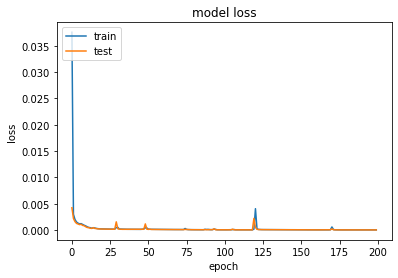

------------------------------ Loading the best weights ------------------------------


In [23]:
model1 = model_fit(model1,'model1_hires2',WEIGHTS,train,train,200,5)

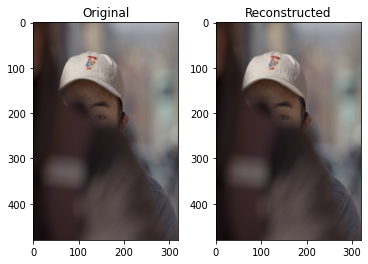

SSIM Calculation: 100%|████████████████████████████████████████████████████████████| 480/480 [00:00<00:00, 1285.24it/s]


------------------------------ 0.011522509253722077


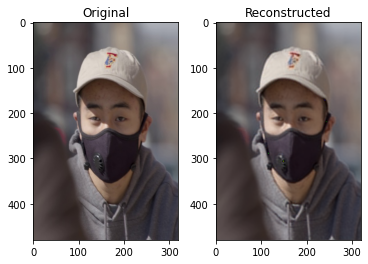

SSIM Calculation: 100%|████████████████████████████████████████████████████████████| 480/480 [00:00<00:00, 1272.84it/s]


------------------------------ 0.00690667477609526


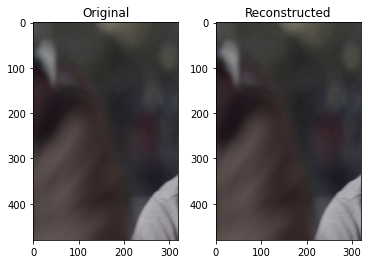

SSIM Calculation: 100%|████████████████████████████████████████████████████████████| 480/480 [00:00<00:00, 1312.16it/s]


------------------------------ 0.009941779190746073


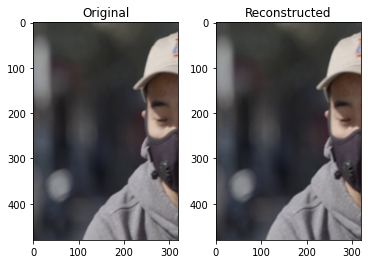

SSIM Calculation: 100%|████████████████████████████████████████████████████████████| 480/480 [00:00<00:00, 1297.35it/s]


------------------------------ 0.008053019269095062


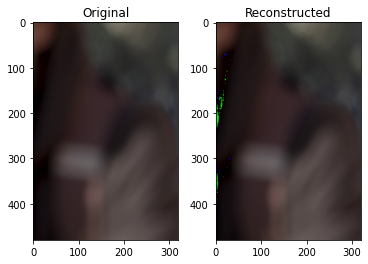

SSIM Calculation: 100%|████████████████████████████████████████████████████████████| 480/480 [00:00<00:00, 1296.27it/s]

------------------------------ 0.043752948824524386


In [24]:
num = random.sample(range(0,len(train)),5)
for i in num:
    im = train[i]
    pred=model1.predict(np.expand_dims(im,axis=0))
    plt.subplot(121)
    plt.imshow(np.uint8(im*255.))
    plt.title('Original')

    plt.subplot(122)
    plt.imshow(np.uint8(pred[0,:,:,:] * 255.))
    plt.title('Reconstructed')

    plt.show()

    print('-'*30,overall_ssim(train[i],np.uint8(pred[0,:,:,:])))

100%|████████████████████████████████████████████████████████████████████████████████| 201/201 [00:23<00:00,  8.39it/s]


The shape of the input for the model is (201, 480, 320, 3)
(201, 480, 320, 3)
Epoch 1/500
32/32 [==============================] - 2s 77ms/step - loss: 0.0177 - mae: 0.0770 - val_loss: 0.0018 - val_mae: 0.0238
Epoch 2/500
32/32 [==============================] - 2s 69ms/step - loss: 0.0016 - mae: 0.0202 - val_loss: 0.0013 - val_mae: 0.0177
Epoch 3/500
32/32 [==============================] - 2s 70ms/step - loss: 0.0012 - mae: 0.0168 - val_loss: 0.0010 - val_mae: 0.0148
Epoch 4/500
32/32 [==============================] - 2s 69ms/step - loss: 8.8969e-04 - mae: 0.0108 - val_loss: 7.5902e-04 - val_mae: 0.0081
Epoch 5/500
32/32 [==============================] - 2s 69ms/step - loss: 7.4521e-04 - mae: 0.0077 - val_loss: 6.8581e-04 - val_mae: 0.0070
Epoch 6/500
32/32 [==============================] - 2s 70ms/step - loss: 6.8778e-04 - mae: 0.0069 - val_loss: 6.4541e-04 - val_mae: 0.0066
Epoch 7/500
32/32 [==============================] - 2s 70ms/step - loss: 6.5769e-04 - mae: 0.0069 - val_l

Epoch 57/500
32/32 [==============================] - 2s 68ms/step - loss: 2.2379e-04 - mae: 0.0032 - val_loss: 2.1634e-04 - val_mae: 0.0032
Epoch 58/500
32/32 [==============================] - 2s 67ms/step - loss: 2.2483e-04 - mae: 0.0033 - val_loss: 2.1816e-04 - val_mae: 0.0034
Epoch 59/500
32/32 [==============================] - 2s 68ms/step - loss: 2.2441e-04 - mae: 0.0033 - val_loss: 2.1637e-04 - val_mae: 0.0034
Epoch 60/500
32/32 [==============================] - 2s 69ms/step - loss: 2.2243e-04 - mae: 0.0032 - val_loss: 2.1297e-04 - val_mae: 0.0030
Epoch 61/500
32/32 [==============================] - 2s 69ms/step - loss: 2.2105e-04 - mae: 0.0031 - val_loss: 2.1209e-04 - val_mae: 0.0029
Epoch 62/500
32/32 [==============================] - 2s 68ms/step - loss: 2.2023e-04 - mae: 0.0030 - val_loss: 2.1158e-04 - val_mae: 0.0030
Epoch 63/500
32/32 [==============================] - 2s 69ms/step - loss: 2.1982e-04 - mae: 0.0030 - val_loss: 2.1121e-04 - val_mae: 0.0029
Epoch 64/500


Epoch 115/500
32/32 [==============================] - 2s 69ms/step - loss: 2.0426e-04 - mae: 0.0029 - val_loss: 1.9668e-04 - val_mae: 0.0028
Epoch 116/500
32/32 [==============================] - 2s 70ms/step - loss: 2.0411e-04 - mae: 0.0029 - val_loss: 1.9657e-04 - val_mae: 0.0028
Epoch 117/500
32/32 [==============================] - 2s 70ms/step - loss: 2.0429e-04 - mae: 0.0029 - val_loss: 1.9891e-04 - val_mae: 0.0030
Epoch 118/500
32/32 [==============================] - 2s 68ms/step - loss: 2.0445e-04 - mae: 0.0030 - val_loss: 1.9732e-04 - val_mae: 0.0029
Epoch 119/500
32/32 [==============================] - 2s 69ms/step - loss: 2.0376e-04 - mae: 0.0029 - val_loss: 1.9623e-04 - val_mae: 0.0028
Epoch 120/500
32/32 [==============================] - 2s 69ms/step - loss: 2.0341e-04 - mae: 0.0029 - val_loss: 1.9569e-04 - val_mae: 0.0027
Epoch 121/500
32/32 [==============================] - 2s 67ms/step - loss: 2.0351e-04 - mae: 0.0029 - val_loss: 1.9676e-04 - val_mae: 0.0029
Epoch 

Epoch 173/500
32/32 [==============================] - 2s 67ms/step - loss: 1.9561e-04 - mae: 0.0028 - val_loss: 1.8891e-04 - val_mae: 0.0027
Epoch 174/500
32/32 [==============================] - 2s 67ms/step - loss: 2.0328e-04 - mae: 0.0035 - val_loss: 2.0078e-04 - val_mae: 0.0037
Epoch 175/500
32/32 [==============================] - 2s 68ms/step - loss: 1.9926e-04 - mae: 0.0032 - val_loss: 1.8906e-04 - val_mae: 0.0027
Epoch 176/500
32/32 [==============================] - 2s 68ms/step - loss: 1.9544e-04 - mae: 0.0028 - val_loss: 1.8932e-04 - val_mae: 0.0029
Epoch 177/500
32/32 [==============================] - 2s 67ms/step - loss: 1.9595e-04 - mae: 0.0029 - val_loss: 1.8906e-04 - val_mae: 0.0028
Epoch 178/500
32/32 [==============================] - 2s 69ms/step - loss: 1.9544e-04 - mae: 0.0029 - val_loss: 1.8821e-04 - val_mae: 0.0027
Epoch 179/500
32/32 [==============================] - 2s 69ms/step - loss: 1.9435e-04 - mae: 0.0028 - val_loss: 1.8758e-04 - val_mae: 0.0027
Epoch 

Epoch 231/500
32/32 [==============================] - 2s 68ms/step - loss: 1.8897e-04 - mae: 0.0028 - val_loss: 1.8308e-04 - val_mae: 0.0027
Epoch 232/500
32/32 [==============================] - 2s 69ms/step - loss: 1.8898e-04 - mae: 0.0028 - val_loss: 1.8255e-04 - val_mae: 0.0026
Epoch 233/500
32/32 [==============================] - 2s 67ms/step - loss: 1.8884e-04 - mae: 0.0028 - val_loss: 1.8349e-04 - val_mae: 0.0027
Epoch 234/500
32/32 [==============================] - 2s 67ms/step - loss: 1.9679e-04 - mae: 0.0035 - val_loss: 1.9934e-04 - val_mae: 0.0040
Epoch 235/500
32/32 [==============================] - 2s 68ms/step - loss: 1.9427e-04 - mae: 0.0032 - val_loss: 1.8668e-04 - val_mae: 0.0030
Epoch 236/500
32/32 [==============================] - 2s 67ms/step - loss: 1.9065e-04 - mae: 0.0029 - val_loss: 1.8288e-04 - val_mae: 0.0027
Epoch 237/500
32/32 [==============================] - 2s 69ms/step - loss: 1.8880e-04 - mae: 0.0028 - val_loss: 1.8251e-04 - val_mae: 0.0026
Epoch 

Epoch 289/500
32/32 [==============================] - 2s 67ms/step - loss: 1.8463e-04 - mae: 0.0027 - val_loss: 1.7954e-04 - val_mae: 0.0027
Epoch 290/500
32/32 [==============================] - 2s 68ms/step - loss: 1.8528e-04 - mae: 0.0028 - val_loss: 1.8028e-04 - val_mae: 0.0028
Epoch 291/500
32/32 [==============================] - 2s 68ms/step - loss: 1.8500e-04 - mae: 0.0028 - val_loss: 1.7878e-04 - val_mae: 0.0026
Epoch 292/500
32/32 [==============================] - 2s 67ms/step - loss: 1.8420e-04 - mae: 0.0027 - val_loss: 1.7904e-04 - val_mae: 0.0027
Epoch 293/500
32/32 [==============================] - 2s 68ms/step - loss: 1.8438e-04 - mae: 0.0027 - val_loss: 1.7879e-04 - val_mae: 0.0026
Epoch 294/500
32/32 [==============================] - 2s 69ms/step - loss: 1.8406e-04 - mae: 0.0027 - val_loss: 1.7861e-04 - val_mae: 0.0026
Epoch 295/500
32/32 [==============================] - 2s 67ms/step - loss: 1.8499e-04 - mae: 0.0028 - val_loss: 1.7887e-04 - val_mae: 0.0026
Epoch 

Epoch 347/500
32/32 [==============================] - 2s 69ms/step - loss: 1.8146e-04 - mae: 0.0027 - val_loss: 1.7605e-04 - val_mae: 0.0026
Epoch 348/500
32/32 [==============================] - 2s 69ms/step - loss: 1.8098e-04 - mae: 0.0026 - val_loss: 1.7602e-04 - val_mae: 0.0026
Epoch 349/500
32/32 [==============================] - 2s 67ms/step - loss: 1.8083e-04 - mae: 0.0027 - val_loss: 1.7603e-04 - val_mae: 0.0026
Epoch 350/500
32/32 [==============================] - 2s 69ms/step - loss: 1.8069e-04 - mae: 0.0026 - val_loss: 1.7579e-04 - val_mae: 0.0026
Epoch 351/500
32/32 [==============================] - 2s 69ms/step - loss: 1.8057e-04 - mae: 0.0026 - val_loss: 1.7577e-04 - val_mae: 0.0026
Epoch 352/500
32/32 [==============================] - 2s 68ms/step - loss: 1.8071e-04 - mae: 0.0026 - val_loss: 1.7680e-04 - val_mae: 0.0026
Epoch 353/500
32/32 [==============================] - 2s 68ms/step - loss: 1.8331e-04 - mae: 0.0029 - val_loss: 1.8350e-04 - val_mae: 0.0033
Epoch 

Epoch 405/500
32/32 [==============================] - 2s 68ms/step - loss: 1.8244e-04 - mae: 0.0030 - val_loss: 1.7543e-04 - val_mae: 0.0027
Epoch 406/500
32/32 [==============================] - 2s 67ms/step - loss: 1.8148e-04 - mae: 0.0029 - val_loss: 1.7487e-04 - val_mae: 0.0026
Epoch 407/500
32/32 [==============================] - 2s 68ms/step - loss: 1.7909e-04 - mae: 0.0027 - val_loss: 1.7432e-04 - val_mae: 0.0025
Epoch 408/500
32/32 [==============================] - 2s 68ms/step - loss: 1.7877e-04 - mae: 0.0026 - val_loss: 1.7462e-04 - val_mae: 0.0027
Epoch 409/500
32/32 [==============================] - 2s 69ms/step - loss: 1.7888e-04 - mae: 0.0026 - val_loss: 1.7428e-04 - val_mae: 0.0026
Epoch 410/500
32/32 [==============================] - 2s 69ms/step - loss: 1.7881e-04 - mae: 0.0026 - val_loss: 1.7423e-04 - val_mae: 0.0026
Epoch 411/500
32/32 [==============================] - 2s 68ms/step - loss: 1.7877e-04 - mae: 0.0026 - val_loss: 1.7464e-04 - val_mae: 0.0026
Epoch 

Epoch 463/500
32/32 [==============================] - 2s 69ms/step - loss: 1.7723e-04 - mae: 0.0026 - val_loss: 1.7306e-04 - val_mae: 0.0025
Epoch 464/500
32/32 [==============================] - 2s 67ms/step - loss: 1.7710e-04 - mae: 0.0026 - val_loss: 1.7317e-04 - val_mae: 0.0025
Epoch 465/500
32/32 [==============================] - 2s 68ms/step - loss: 1.7717e-04 - mae: 0.0026 - val_loss: 1.7325e-04 - val_mae: 0.0026
Epoch 466/500
32/32 [==============================] - 2s 68ms/step - loss: 1.7713e-04 - mae: 0.0026 - val_loss: 1.7308e-04 - val_mae: 0.0025
Epoch 467/500
32/32 [==============================] - 2s 68ms/step - loss: 1.7704e-04 - mae: 0.0026 - val_loss: 1.7444e-04 - val_mae: 0.0026
Epoch 468/500
32/32 [==============================] - 2s 67ms/step - loss: 1.7799e-04 - mae: 0.0027 - val_loss: 1.7519e-04 - val_mae: 0.0029
Epoch 469/500
32/32 [==============================] - 2s 68ms/step - loss: 1.7774e-04 - mae: 0.0027 - val_loss: 1.7345e-04 - val_mae: 0.0026
Epoch 

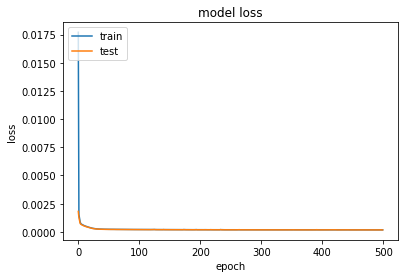

------------------------------ Loading the best weights ------------------------------


In [25]:
train_intermediate = data_prep(train,model1,None)
# train_intermediate = np.uint8(train_intermediate)
print(train_intermediate.shape)
model2 = model_fit(model2,'model2_hires2',WEIGHTS,train_intermediate,train,500,5)

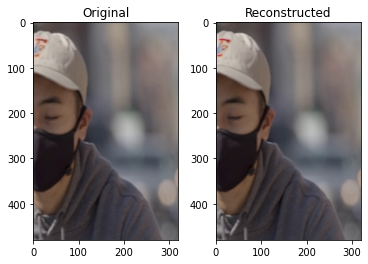

SSIM Calculation: 100%|████████████████████████████████████████████████████████████| 480/480 [00:00<00:00, 1321.19it/s]


------------------------------ 0.9969642104588633


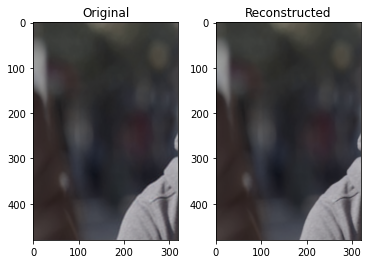

SSIM Calculation: 100%|████████████████████████████████████████████████████████████| 480/480 [00:00<00:00, 1402.49it/s]


------------------------------ 0.9981260633987499


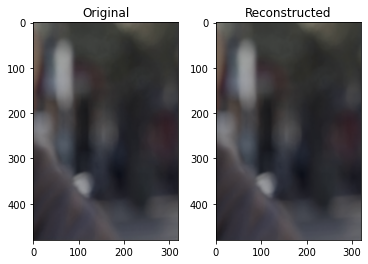

SSIM Calculation: 100%|████████████████████████████████████████████████████████████| 480/480 [00:00<00:00, 1355.34it/s]


------------------------------ 0.9996188527163105


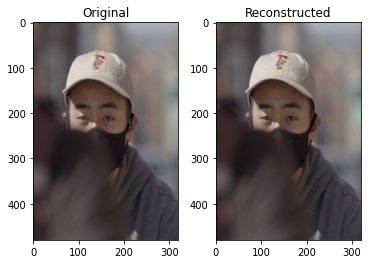

SSIM Calculation: 100%|████████████████████████████████████████████████████████████| 480/480 [00:00<00:00, 1371.13it/s]


------------------------------ 0.9947599946775517


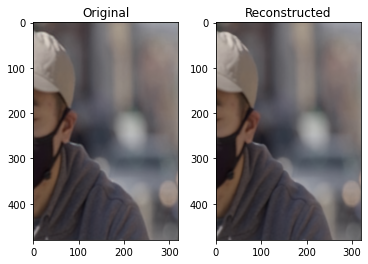

SSIM Calculation: 100%|████████████████████████████████████████████████████████████| 480/480 [00:00<00:00, 1343.44it/s]

------------------------------ 0.9986485827870105


In [26]:
num = random.sample(range(0,len(train_intermediate)),5)
for i in num:
    im = train_intermediate[i]
    pred=model2.predict(np.expand_dims(im,axis=0))
    plt.subplot(121)
    plt.imshow(np.uint8(im*255.))
    plt.title('Original')

    plt.subplot(122)
    plt.imshow(np.uint8(pred[0,:,:,:]*255.))
    plt.title('Reconstructed')

    plt.show()

    print('-'*30,overall_ssim(train_intermediate[i],pred[0,:,:,:]))

In [28]:
predictions = data_prepration(images,model1,model2)

100%|████████████████████████████████████████████████████████████████████████████████| 224/224 [00:35<00:00,  6.35it/s]


The shape of the input for the model is (224, 480, 320, 3)


In [30]:
predictions

In [ ]:
predictions = predictions * 255.

In [31]:
con = []
for i in tqdm(range(0,len(predictions)-1,2),desc='Concatenating Frames'):
        x3 = cv2.hconcat([predictions[i,:,:,:],predictions[i+1,:,:,:]])
        con.append(x3)

Concatenating Frames: 100%|████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 2204.32it/s]


In [32]:
# con1 = np.uint8(con)
con1 = np.array(con)
con1.shape

(112, 480, 640, 3)

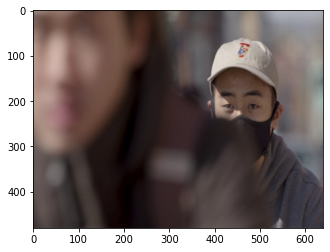

In [33]:
plt.imshow(con1[19])

In [19]:
os.getcwd()

'C:\\Users\\saad\\Desktop\\Autoencoders\\Videos\\Code'

In [34]:
import imageio

In [35]:
writer = imageio.get_writer('new_xyz12.mp4', format='mp4', mode='I', fps=25)

for i in range(112):
    writer.append_data(np.asarray(con1[i]))

writer.close()

In [ ]:
!pip install imageio-ffmpeg

In [ ]:
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
video = cv2.VideoWriter('xyz_new.avi', fourcc , 25., (640,480))
    
for n in tqdm(range(len(con1)),desc='video making'):
    video.write(con1[n,:,:,:])

cv2.destroyAllWindows()
video.release()

In [ ]:
video_creater('Recon_hires2_3.avi',VIDEO,25.,640,480,predictions)

In [ ]:
plt.imshow(predictions[100,:,:,:].astype(int))

In [ ]:
foo = cv2.hconcat([predictions[0,:,:,:],predictions[1,:,:,:]])
plt.imshow(foo.astype(int))

## Transfering the Learning to Rabbit Video

In [36]:
DATASET = r'C:\Users\saad\Desktop\Autoencoders\Videos\Dataset' ## where there is dataset
DATASET_NAME = r'bicycle_sequence.mp4' ## Name of the video
FRAMES = r'C:\Users\saad\Desktop\Autoencoders\Videos\Results\rabbit - Copy' ## where you want to save the frames
RECONSTRUCTED = r'C:\Users\saad\Desktop\Autoencoders\Videos\Results\ReconVideo_Frames' ## where the reconstructed frames are saved
WEIGHTS = r'C:\Users\saad\Desktop\Autoencoders\Videos\Results\Weights'
VIDEO = r'C:\Users\saad\Desktop\Autoencoders\Videos\Results\Video'
ROOT = r'C:\Users\saad\Desktop\Autoencoders\Videos\Results'

WIDTH = 640 ## width of the reconstrcted image
HEIGHT = 480 ## height of the reconstrcted image
FPS = 25 ## fps of the reconstrcted image
SLICES = 2 ## Number of slices to be made on the image

TEST_SIZE = 0.1
EMBEDDING_SIZE = 512 ## bottleneck layer nodes

In [38]:
images = np.array(read_imgs(FRAMES,os.listdir(FRAMES),SLICES,WIDTH,HEIGHT))
images = images/255.
print(images.shape)

(532, 480, 320, 3)


In [39]:
predictions = data_prepration(images,model1,model2)

100%|████████████████████████████████████████████████████████████████████████████████| 532/532 [01:24<00:00,  6.29it/s]


The shape of the input for the model is (532, 480, 320, 3)


In [40]:
predictions[0]

array([[[ 80,  80,  77],
        [ 81,  81,  78],
        [ 79,  81,  77],
        ...,
        [ 53,  56,  53],
        [ 55,  57,  55],
        [ 56,  58,  56]],

       [[ 81,  81,  79],
        [ 76,  77,  73],
        [ 76,  79,  75],
        ...,
        [ 53,  56,  53],
        [ 53,  55,  52],
        [ 53,  55,  52]],

       [[ 79,  80,  79],
        [ 77,  78,  76],
        [ 77,  80,  77],
        ...,
        [ 53,  57,  54],
        [ 53,  56,  53],
        [ 52,  57,  54]],

       ...,

       [[191, 182, 152],
        [180, 179, 133],
        [179, 175, 127],
        ...,
        [148, 159,  92],
        [152, 164, 102],
        [151, 156, 103]],

       [[184, 175, 154],
        [175, 169, 137],
        [173, 167, 129],
        ...,
        [147, 153,  98],
        [146, 154, 102],
        [143, 150, 104]],

       [[180, 170, 159],
        [175, 167, 145],
        [174, 168, 139],
        ...,
        [154, 151, 108],
        [146, 148, 104],
        [142, 145, 106]]

In [41]:
con = []
for i in tqdm(range(0,len(predictions)-1,2),desc='Concatenating Frames'):
        x3 = cv2.hconcat([predictions[i,:,:,:],predictions[i+1,:,:,:]])
        con.append(x3)

Concatenating Frames: 100%|████████████████████████████████████████████████████████| 266/266 [00:00<00:00, 2234.07it/s]


In [42]:
con1 = np.array(con)
con1.shape

(266, 480, 640, 3)

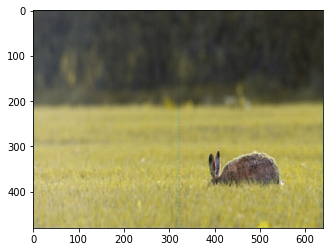

In [44]:
plt.imshow(con1[0])

In [54]:
color_percentage_for_each_frame = (100/len(con1))/100
writer = imageio.get_writer('new_rabbit.mp4', format='mp4', mode='I', fps=25)

for i in range(len(con1)):
    writer.append_data(np.asarray(con1[i]))

writer.close()

In [ ]:
video = cv2.VideoWriter('xyz_rabbit.avi', 0 , 25., (640,480))
    
for n in tqdm(range(len(con1)),desc='video making'):
    video.write(con1[n,:,:,:])

cv2.destroyAllWindows()
video.release()

## Transferring learning to bunny video

In [55]:
DATASET = r'C:\Users\saad\Desktop\Autoencoders\Videos\Dataset' ## where there is dataset
DATASET_NAME = r'bunny_video.mp4' ## Name of the video
FRAMES = r'C:\Users\saad\Desktop\Autoencoders\Videos\Results\bunny - Copy' ## where you want to save the frames
RECONSTRUCTED = r'C:\Users\saad\Desktop\Autoencoders\Videos\Results\ReconVideo_Frames' ## where the reconstructed frames are saved
WEIGHTS = r'C:\Users\saad\Desktop\Autoencoders\Videos\Results\Weights'
VIDEO = r'C:\Users\saad\Desktop\Autoencoders\Videos\Results\Video'
ROOT = r'C:\Users\saad\Desktop\Autoencoders\Videos\Results'

WIDTH = 640 ## width of the reconstrcted image
HEIGHT = 480 ## height of the reconstrcted image
FPS = 25 ## fps of the reconstrcted image
SLICES = 2 ## Number of slices to be made on the image

TEST_SIZE = 0.1
EMBEDDING_SIZE = 512 ## bottleneck layer nodes

In [56]:
images = np.array(read_imgs(FRAMES,os.listdir(FRAMES),SLICES,WIDTH,HEIGHT))
images = images/255.
print(images.shape)

(1478, 480, 320, 3)


In [57]:
predictions = data_prepration(images,model1,model2)

100%|██████████████████████████████████████████████████████████████████████████████| 1478/1478 [03:59<00:00,  6.18it/s]


The shape of the input for the model is (1478, 480, 320, 3)


In [58]:
con = []
for i in tqdm(range(0,len(predictions)-1,2),desc='Concatenating Frames'):
        x3 = cv2.hconcat([predictions[i,:,:,:],predictions[i+1,:,:,:]])
        con.append(x3)

Concatenating Frames: 100%|████████████████████████████████████████████████████████| 739/739 [00:00<00:00, 1902.88it/s]


In [59]:
con1 = np.array(con)
con1.shape

(739, 480, 640, 3)

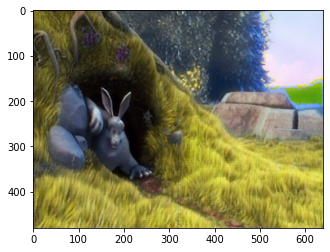

In [60]:
plt.imshow(con1[0])

In [61]:
writer = imageio.get_writer('new_bunny.mp4', format='mp4', mode='I', fps=25)

for i in range(len(con1)):
    writer.append_data(np.asarray(con1[i]))

writer.close()

In [62]:
os.getcwd()

'C:\\Users\\saad\\Desktop\\Autoencoders\\Videos\\Results\\rabbit - Copy'

In [63]:
model1.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 480, 320, 3)]     0         
_________________________________________________________________
functional_9 (Functional)    (None, 60, 40, 32)        19392     
_________________________________________________________________
functional_11 (Functional)   (None, 480, 320, 3)       19363     
Total params: 38,755
Trainable params: 38,755
Non-trainable params: 0
_________________________________________________________________


In [64]:
(480*320*3)/(60*40*32)

6.0